# Project 1 – Group 34
## Dataset: Heart Failure Clinical Records
**Source:** [UCI Machine Learning Repository](https://doi.org/10.24432/C5Z89R)
 
> This dataset contains the medical records of 299 patients who experienced heart failure, collected during their follow-up period. Each patient profile includes 13 clinical features.

In [2]:
import numpy as np
import pandas as pd
from scipy.io import loadmat

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

# Plotting style
sns.set_style('darkgrid')
sns.set_theme(font_scale=1.)

Load data set and and split into the standard format(X,y),
Explanation of the data set:

$y$ is the target variable: **DEATH_EVENT** (binary indicator of patient death)

### Feature Description
| Feature                   | Type       | Description                                               | Unit                | Missing Values |
|---------------------------|------------|-----------------------------------------------------------|---------------------|---------------|
| age                       | Integer    | Age of the patient                                        | years               | no            |
| anaemia                   | Binary     | Decrease of red blood cells or hemoglobin                 | —                   | no            |
| creatinine_phosphokinase  | Integer    | Level of the CPK enzyme in the blood                      | mcg/L               | no            |
| diabetes                  | Binary     | If the patient has diabetes                               | —                   | no            |
| ejection_fraction         | Integer    | Percentage of blood leaving the heart at each contraction | %                   | no            |
| high_blood_pressure       | Binary     | If the patient has hypertension                           | —                   | no            |
| platelets                 | Continuous | Platelets in the blood                                    | kiloplatelets/mL    | no            |
| serum_creatinine          | Continuous | Level of serum creatinine in the blood                    | mg/dL               | no            |
| serum_sodium              | Integer    | Level of serum sodium in the blood                        | mEq/L               | no            |
| sex                       | Binary     | Sex (woman or man)                                        | —                   | no            |
| smoking                   | Binary     | If the patient smokes or not                              | —                   | no            |
| time                      | Integer    | Follow-up period                                          | days                | no            |
| death_event               | Binary     | If the patient died during the follow-up period           | —                   | no            |

In [3]:
df = pd.read_csv('../02452_Group34_Project1/data/heart_failure_clinical_records_dataset.csv')

X = df.drop(columns=['DEATH_EVENT'])         # Features without target
y = pd.Categorical(df['DEATH_EVENT'])        # Target as categorical

# Check the shape of the data
N, M = X.shape
assert N == 299, "There should be 299 samples in the Heart Failure dataset."
assert M == 12, "There should be 12 features in the Heart Failure dataset(13 together - target)"

# Display the first few rows of the dataframe
display(X.head())
display(y[:6])







,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


[1, 1, 1, 1, 1, 1]
Categories (2, int64): [0, 1]

In [4]:
print(X)



      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

Check for missing vallues and outliers

Missing values per column:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


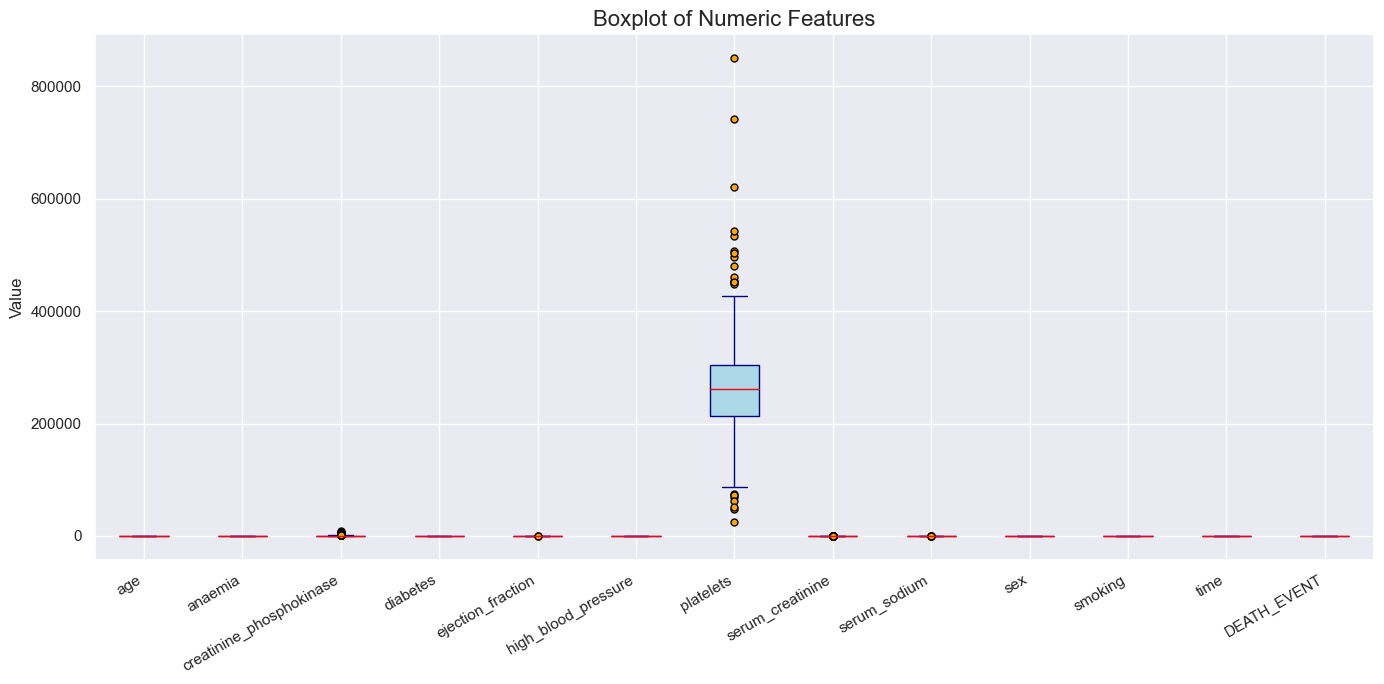

In [5]:
print("Missing values per column:")
print(df.isnull().sum())

plt.figure(figsize=(14,7))
box = df.boxplot(patch_artist=True,
                              boxprops=dict(facecolor='lightblue', color='navy'),
                              medianprops=dict(color='red'),
                              whiskerprops=dict(color='navy'),
                              capprops=dict(color='navy'),
                              flierprops=dict(markerfacecolor='orange', marker='o', markersize=5))
plt.title("Boxplot of Numeric Features", fontsize=16)
plt.ylabel("Value", fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=11)
plt.tight_layout()
plt.show()

We can see there are no missing vallues, but there might be some outliers based on the box plot. We need to do subplots of all to determine that

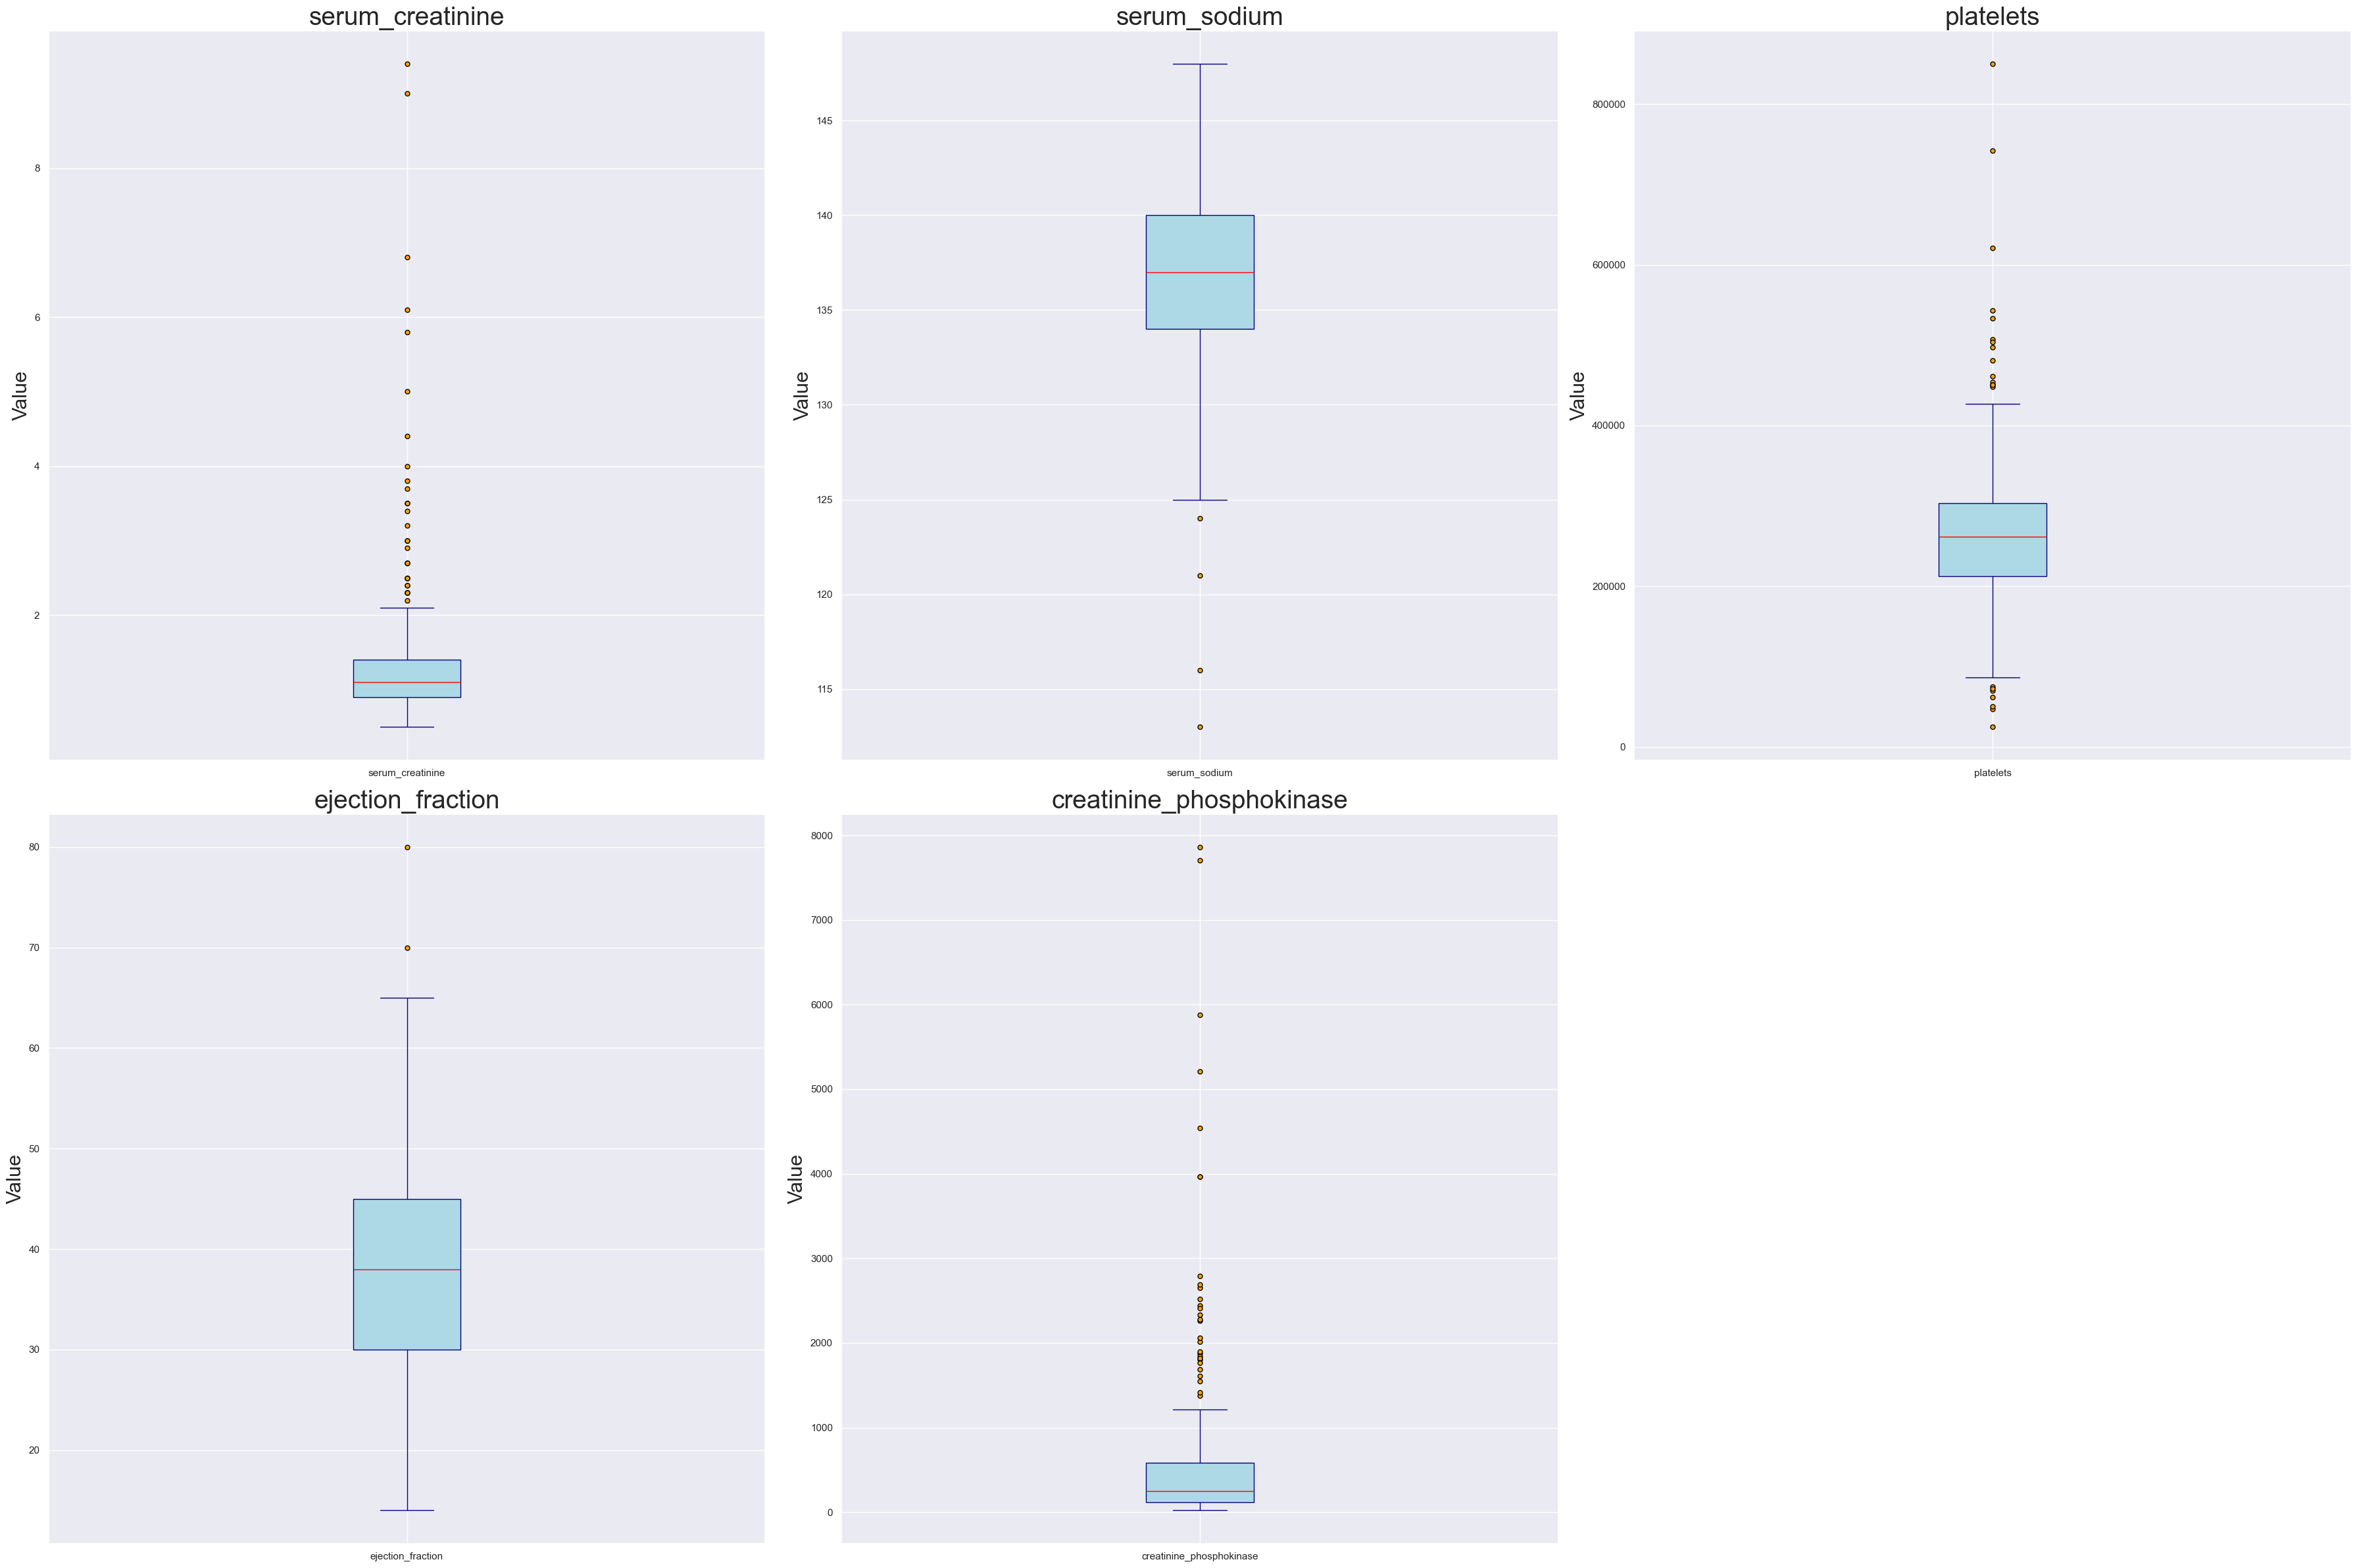

In [6]:
columns_to_show = ['serum_creatinine', 'serum_sodium', 'platelets', 'ejection_fraction', 'creatinine_phosphokinase']
fig, axes = plt.subplots(nrows=2, ncols=int(np.ceil(len(columns_to_show)/2)), figsize=(36, 24))  
axes = axes.flatten()

for i, col in enumerate(columns_to_show):
    df.boxplot(column=col, ax=axes[i], patch_artist=True,
               boxprops=dict(facecolor='lightblue', color='navy'),
               medianprops=dict(color='red'),
               whiskerprops=dict(color='navy'),
               capprops=dict(color='navy'),
               flierprops=dict(markerfacecolor='orange', marker='o', markersize=5))
    axes[i].set_title(col, fontsize=28)
    axes[i].set_ylabel("Value", fontsize=22)

# Hide any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

We can see in many of the numeric features there might be outliers fx ejection_fraction we see 2 vallues that are out of the scale for the rest of the values 

In [7]:
# Display summary statistics for all attributes
summary_stats = df.describe(include='all').transpose()
display(summary_stats)

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


Non-binary variables: ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']


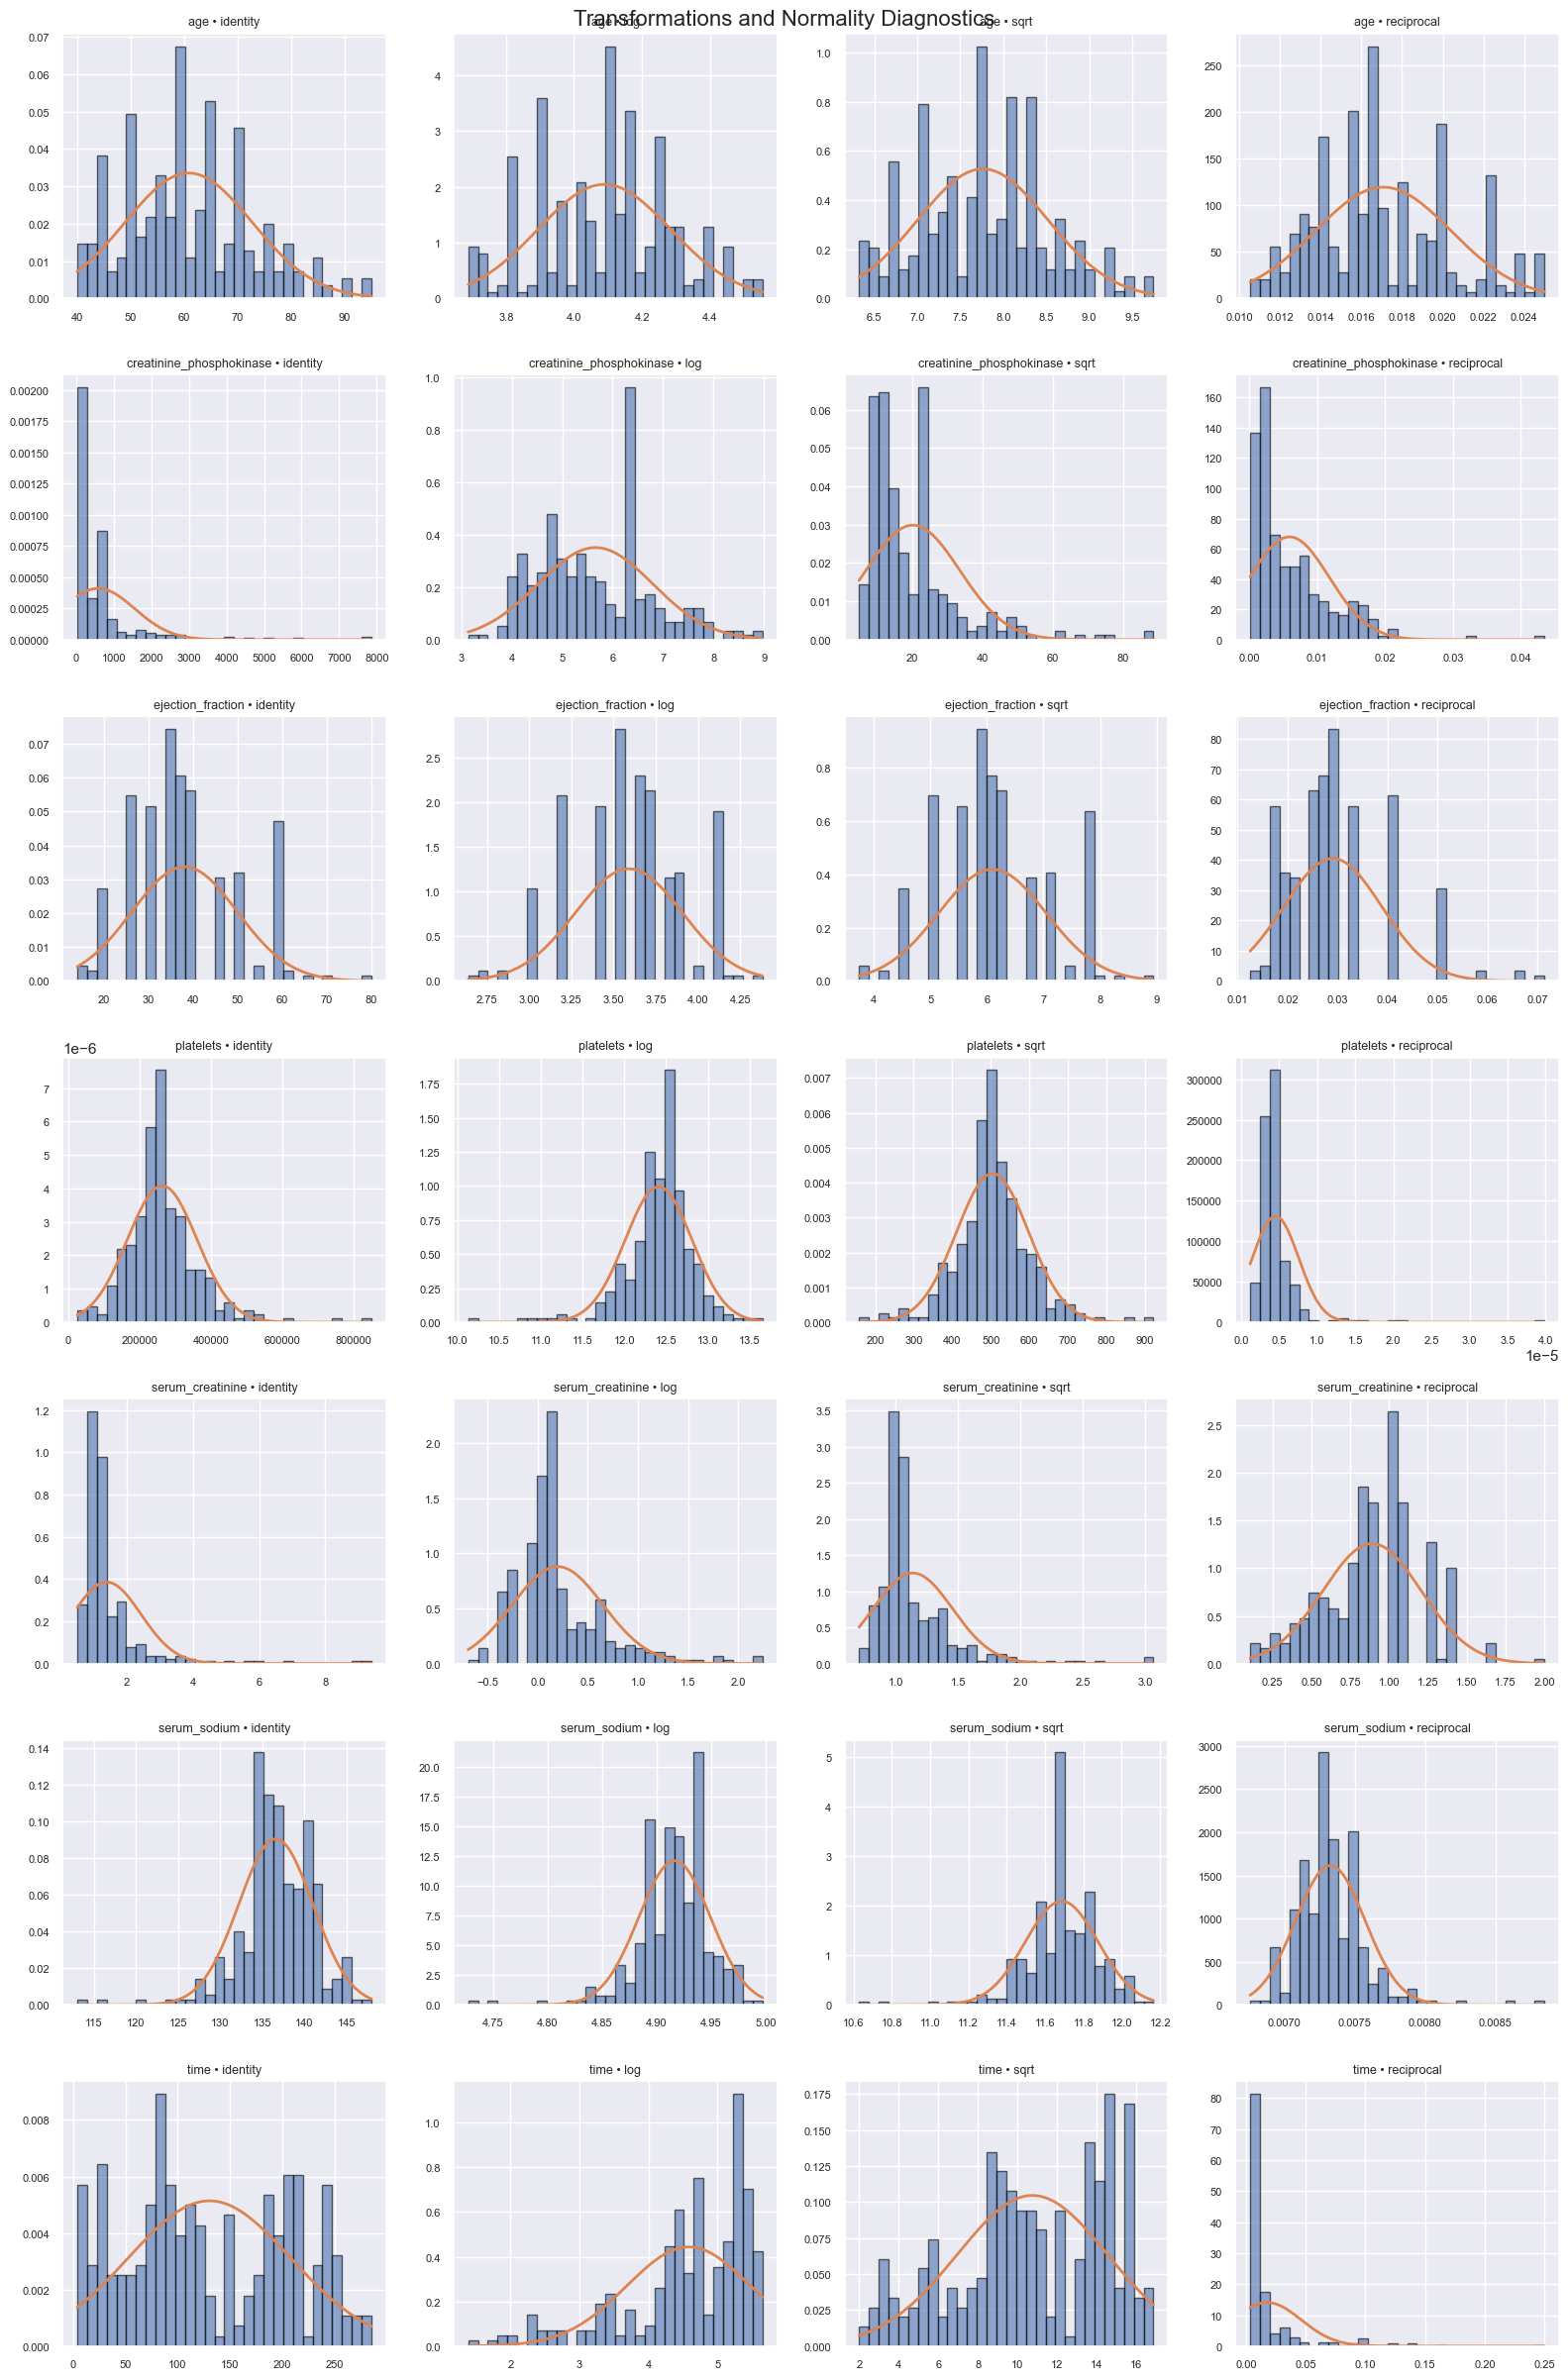

,attribute,transform,skewness,excess_kurtosis,original_skewness,original_excess_kurtosis,delta_skewness,delta_excess_kurtosis,delta_score
0,age,identity,0.423,0.185,0.423,0.185,0.000,0.000,0.000
1,age,log,0.016,0.546,0.423,0.185,-0.407,0.361,-0.046
2,age,sqrt,0.199,0.430,0.423,0.185,-0.224,0.245,0.021
3,age,reciprocal,0.426,0.439,0.423,0.185,0.003,0.254,0.257
4,creatinine_phosphokinase,identity,4.463,25.149,4.463,25.149,0.000,0.000,0.000
5,creatinine_phosphokinase,log,0.414,0.332,4.463,25.149,-4.049,-24.817,-28.866
6,creatinine_phosphokinase,sqrt,2.107,6.090,4.463,25.149,-2.356,-19.059,-21.415
7,creatinine_phosphokinase,reciprocal,1.900,6.241,4.463,25.149,-2.563,-18.908,-21.471
8,ejection_fraction,identity,0.555,0.041,0.555,0.041,0.000,0.000,0.000
9,ejection_fraction,log,0.272,0.053,0.555,0.041,-0.283,0.012,-0.271


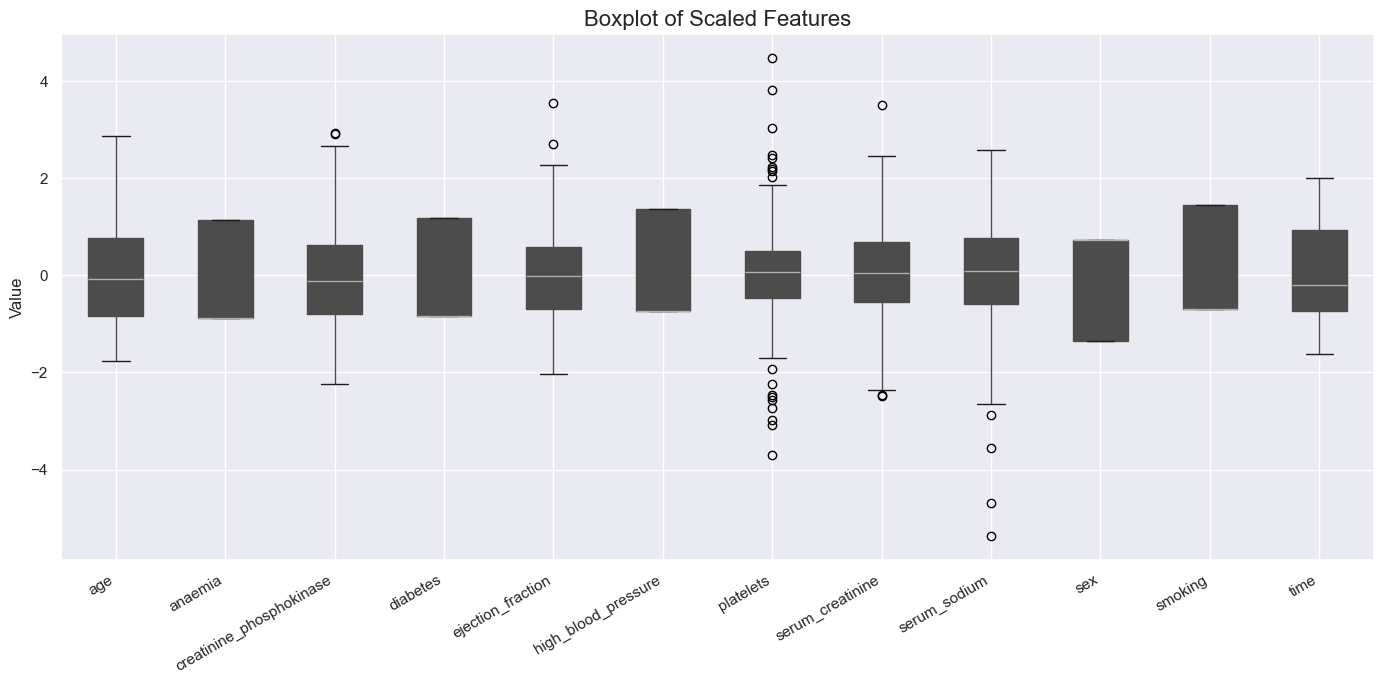

In [8]:


from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler

# non-binary variabler
non_binary_vars = [
    c for c in df.columns
    if pd.api.types.is_numeric_dtype(df[c]) and df[c].nunique() > 2
]
print("Non-binary variables:", non_binary_vars)

# transformationer
def identity(x): return x
def log(x): return np.log(x + 1e-6)   # undgå log(0)
def sqrt(x): return np.sqrt(np.clip(x, 0, None))  # sqrt kræver >=0
def cbrt(x): return np.cbrt(x)        # kan håndtere negative
def reciprocal(x): return 1.0 / (x + 1e-6)  # undgå /0

transforms = {
    "identity": identity,
    "log": log,
    "sqrt": sqrt,
    "reciprocal": reciprocal
}
def trans_matrix(df, transforms):
    nT = len(transforms)
    nV = len(df.columns)
    fig, axes = plt.subplots(nV, nT, figsize=(4*nT, 3.5*nV), squeeze=False)
    fig.suptitle("Transformations and Normality Diagnostics", fontsize=16)
    results = []
    for j, var in enumerate(df.columns):
        x_raw = pd.to_numeric(df[var], errors="coerce")

        for i, (tname, f) in enumerate(transforms.items()):
            xt = pd.to_numeric(f(x_raw), errors="coerce").dropna().values
            
            ax = axes[j, i]
            # histogram i tæthed (density) så normal-PDF kan overlayes direkte
            counts, bins, patches = ax.hist(xt, bins=30, density=True,
                                            edgecolor="black", alpha=0.6)
            # normal-PDF med samme skala (density)
            mu = np.nanmean(xt)
            sd = np.nanstd(xt, ddof=1)
            if np.isfinite(sd) and sd > 0:
                xs = np.linspace(bins[0], bins[-1], 300)
                pdf = (1.0/(sd*np.sqrt(2*np.pi))) * np.exp(-0.5*((xs - mu)/sd)**2)
                ax.plot(xs, pdf, lw=2)

            # titler og småting
            ax.set_title(f"{var} • {tname}", fontsize=9)
            ax.tick_params(labelsize=8)

            # diagnostics
            if i == 0:  # identity
                osk = skew(xt, bias=False)
                oku = kurtosis(xt, fisher=True, bias=False)
            sk = skew(xt, bias=False)
            ku = kurtosis(xt, fisher=True, bias=False)  # excess kurtosis
            results.append({"attribute": var,
                            "transform": tname,
                            "skewness": abs(sk).round(3),
                            "excess_kurtosis": abs(ku).round(3),
                            "original_skewness": abs(osk).round(3),
                            "original_excess_kurtosis": abs(oku).round(3),
                            "delta_skewness": abs(sk).round(3) - abs(osk).round(3),
                            "delta_excess_kurtosis": abs(ku).round(3) - abs(oku).round(3),
                            "delta_score": abs(sk).round(3) + abs(ku).round(3) - (abs(osk).round(3) + abs(oku).round(3))
                            })

    plt.tight_layout()
    fig.suptitle("Transformations and Normality Diagnostics", fontsize=16)
    plt.show()
    return pd.DataFrame(results)

X_transformed = X.copy()

X_transformed['creatinine_phosphokinase'] = log(X_transformed['creatinine_phosphokinase'])
X_transformed['platelets'] = sqrt(X_transformed['platelets'])
X_transformed['serum_creatinine'] = reciprocal(X_transformed['serum_creatinine'])

scaler = StandardScaler()
X_tscaled = pd.DataFrame(scaler.fit_transform(X_transformed), columns=X_transformed.columns)
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

non_bin = trans_matrix(df[non_binary_vars], transforms)
display(non_bin)

plt.figure(figsize=(14,7))
box = X_tscaled.boxplot(patch_artist=True)
box.set_title("Boxplot of Scaled Features", fontsize=16)
box.set_ylabel("Value", fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=11)
plt.tight_layout() 
plt.show()






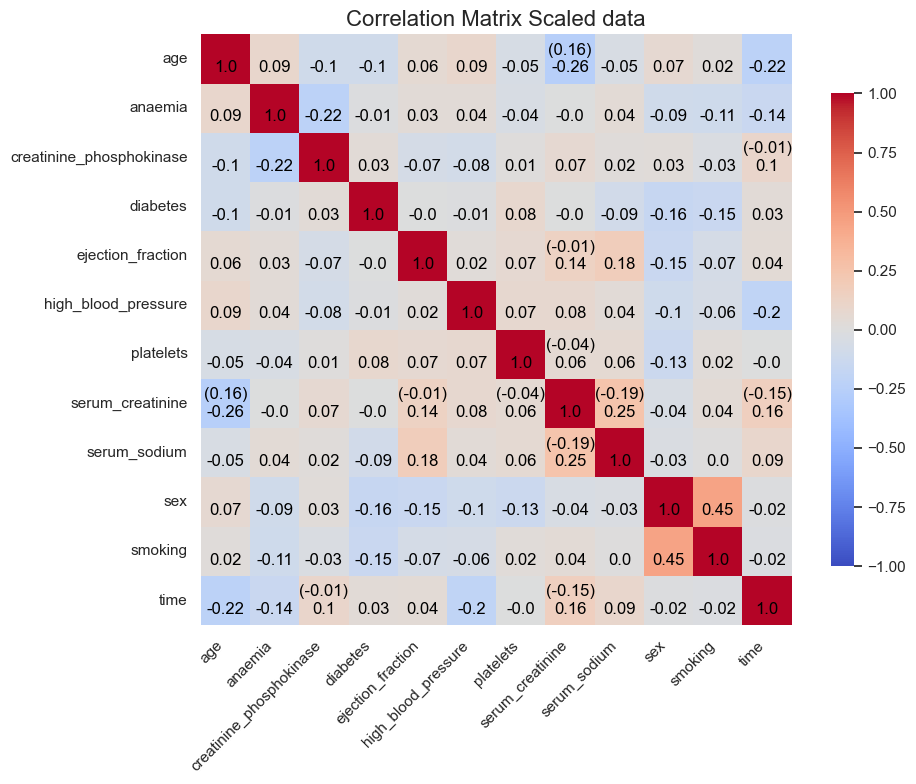

(                               age   anaemia  creatinine_phosphokinase  \
 age                       1.000000  0.088006                 -0.096861   
 anaemia                   0.088006  1.000000                 -0.224115   
 creatinine_phosphokinase -0.096861 -0.224115                  1.000000   
 diabetes                 -0.101012 -0.012729                  0.034560   
 ejection_fraction         0.060098  0.031557                 -0.069127   
 high_blood_pressure       0.093289  0.038182                 -0.079908   
 platelets                -0.051450 -0.039116                  0.009480   
 serum_creatinine         -0.256803 -0.004153                  0.065298   
 serum_sodium             -0.045966  0.041882                  0.019036   
 sex                       0.065430 -0.094769                  0.030810   
 smoking                   0.018668 -0.107290                 -0.025061   
 time                     -0.224068 -0.141414                  0.099370   
 
                       

In [9]:
def corr_with_delta_plot(X, X_scaled, threshold=0.1):
    # Beregn korrelationer
    corr_orig = X.corr()
    corr_scaled = X_scaled.corr()
    delta = corr_scaled - corr_orig

    # For annotering: kun vis delta hvis |ændring| > threshold
    annot = '(' + corr_orig.round(2).astype(str) + ')'
    mask = delta.abs() < threshold
    annot[mask] = ""   # tom streng hvis under tærskel
    annot = annot + '\n' + corr_scaled.round(2).astype(str)
    # Plot det skalerede correlations-plot med delta-annoteringer
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_scaled, cmap="coolwarm", vmin=-1, vmax=1,
                square=True, cbar_kws={"shrink": .8},
                annot=annot, fmt="", annot_kws={"color":"black", "size":12})

    plt.title(f"Correlation Matrix Scaled data", fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    return corr_scaled, delta
corr_with_delta_plot(X, X_tscaled, threshold=0.1)

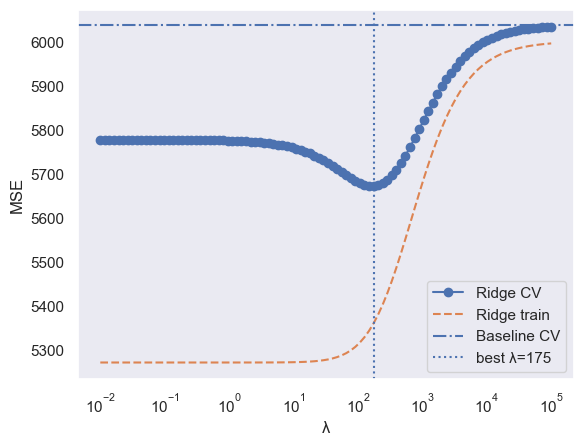

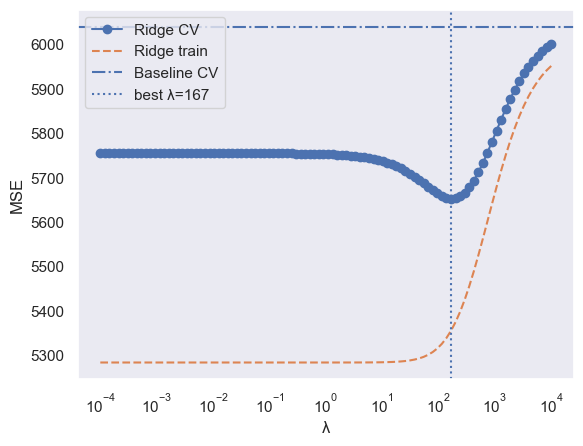

                          Feature      Coef
0                        num__age -9.482717
1        num__high_blood_pressure -9.202670
2                    num__anaemia -6.516241
3           num__serum_creatinine -5.746265
4               num__serum_sodium  3.611230
5   num__creatinine_phosphokinase -2.245963
6          num__ejection_fraction  2.063707
7                    num__smoking -1.588001
8                   num__diabetes  0.756887
9                        num__sex -0.459566
10                 num__platelets -0.091421
                          Feature      Coef
0        num__high_blood_pressure -9.406475
1                        num__age -8.954229
2                    num__anaemia -6.163951
3           num__serum_creatinine  6.063017
4               num__serum_sodium  3.333518
5   num__creatinine_phosphokinase  2.763522
6          num__ejection_fraction  1.818690
7                    num__smoking -1.577635
8                   num__diabetes  0.938079
9                  num__platelet

In [11]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def run_ridge(df, target="time", metric="mse", lambdas=None, k=50,
              transform=False, drop_extra=None, random_state=42, plot=True):
    """Ridge + mean baseline with k-fold CV (train & val), always standardized.
       Set transform=True to apply: log(CPK+1), sqrt(platelets), 1/(serum_creatinine+eps)."""
    if lambdas is None: lambdas = np.logspace(-4, 4,100)
    drop = [target] + (drop_extra or [])
    y = df[target].values
    X = df.drop(columns=drop, errors="ignore").copy()

    # optional 3 transforms (if columns exist)
    if transform:
        eps = 1e-9
        if "creatinine_phosphokinase" in X: X["creatinine_phosphokinase"] = np.log(X["creatinine_phosphokinase"]+1)
        if "platelets" in X:                    X["platelets"] = np.sqrt(X["platelets"])
        if "serum_creatinine" in X:             X["serum_creatinine"] = 1/(X["serum_creatinine"]+eps)

    # preprocess (ALWAYS): scale nums + one-hot cats
    num = X.select_dtypes(include=[np.number]).columns
    cat = X.select_dtypes(exclude=[np.number]).columns
    pre = ColumnTransformer([
        ("num", StandardScaler(), num),
        ("cat", OneHotEncoder(drop="if_binary", handle_unknown="ignore"), cat)
    ])
    ridge = Pipeline([("pre", pre), ("m", Ridge(random_state=0))])
    base  = Pipeline([("pre", pre), ("m", DummyRegressor(strategy="mean"))])

    def m(y_t, y_p):
        return mean_absolute_error(y_t,y_p) if metric=="mae" else (r2_score(y_t,y_p) if metric=="r2" else mean_squared_error(y_t,y_p))
    hi = (metric=="r2")
    kf = KFold(k, shuffle=True, random_state=random_state)

    # CV over lambdas (train & val)
    tr_all, va_all = [], []
    for l in lambdas:
        tr, va = [], []
        for i_tr, i_va in kf.split(X):
            Xtr, Xva = X.iloc[i_tr], X.iloc[i_va]; ytr, yva = y[i_tr], y[i_va]
            ridge.set_params(m__alpha=l).fit(Xtr, ytr)
            tr.append(m(ytr, ridge.predict(Xtr))); va.append(m(yva, ridge.predict(Xva)))
        tr_all.append(np.mean(tr)); va_all.append(np.mean(va))
    tr_all, va_all = np.array(tr_all), np.array(va_all)
    best = lambdas[np.argmax(va_all) if hi else np.argmin(va_all)]

    # Baseline
    bt, bv = [], []
    for i_tr, i_va in kf.split(X):
        Xtr, Xva = X.iloc[i_tr], X.iloc[i_va]; ytr, yva = y[i_tr], y[i_va]
        base.fit(Xtr, ytr)
        bt.append(m(ytr, base.predict(Xtr))); bv.append(m(yva, base.predict(Xva)))
    b_tr, b_va = float(np.mean(bt)), float(np.mean(bv))

    # Plot
    if plot:
        plt.semilogx(lambdas, va_all, 'o-', label="Ridge CV")
        plt.semilogx(lambdas, tr_all, '--', label="Ridge train")
        plt.axhline(b_va, ls='-.', label="Baseline CV")
        plt.axvline(best, ls=':', label=f"best λ={best:.3g}")
        plt.xlabel("λ"); plt.ylabel(metric.upper()); plt.grid(); plt.legend(); plt.show()

    # Final fit + coefficients
    ridge.set_params(m__alpha=best).fit(X, y)
    coefs = pd.DataFrame({
        "Feature": ridge.named_steps["pre"].get_feature_names_out(),
        "Coef": ridge.named_steps["m"].coef_
    }).sort_values(by="Coef", key=lambda s: s.abs(), ascending=False).reset_index(drop=True)

    return {
        "best_lambda": float(best),
        "ridge_train_curve": tr_all, "ridge_cv_curve": va_all,
        "baseline_train": b_tr, "baseline_cv": b_va,
        "coefs": coefs, "features_used": list(num)+list(cat)
    }

# --- Example calls (both ALWAYS standardized):
# Without transforms (raw features):
res_raw = run_ridge(df, target="time", metric="mse", lambdas = np.logspace(-2, 5,100), drop_extra=["DEATH_EVENT"], plot=True)

# With the 3 transforms:
res_tr  = run_ridge(df, target="time", metric="mse", transform=True,  drop_extra=["DEATH_EVENT"], plot=True)

# Top coefficients:
print(res_raw["coefs"].head(12))
print(res_tr["coefs"].head(12))
